# Stock Price Prediction Using Regression Algorithms

## 📝 Introduction:
Stock price prediction is a key area of interest in financial analytics, where accurate forecasting can lead to significant strategic advantages in trading and investing. Due to the volatile nature of the stock market, predicting price movement is a complex task. This project focuses on collecting real-time and historical stock data from the NSE using the nsepython library, and applying machine learning regression techniques to forecast stock prices. The goal is to explore how data-driven models can be leveraged to understand and predict market behavior with reasonable accuracy.

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings("ignore")

from nsepython import *

In [5]:
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


## Data Collection
- Extract historical stock data such as open, high, low, close, and date from the NSE using the nsepython library.

In [7]:
symbol = "NIFTY 50"
start_date = "01-Jan-2001"
end_date = "01-Apr-2025"
df = index_history(symbol,start_date,end_date)
df.head()

,RequestNumber,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,His63883496971689650600,,Nifty 50,01 Apr 2025,23341.1,23565.15,23136.4,23165.70
1,His63883496971689650600,,Nifty 50,28 Mar 2025,23600.4,23649.2,23450.2,23519.35
2,His63883496971689650600,,Nifty 50,27 Mar 2025,23433.95,23646.45,23412.2,23591.95
3,His63883496971689650600,,Nifty 50,26 Mar 2025,23700.95,23736.5,23451.7,23486.85
4,His63883496971689650600,,Nifty 50,25 Mar 2025,23751.5,23869.6,23601.4,23668.65


## Data Cleaning
- Clean and preprocess the data to handle missing values and ensure consistency.

In [9]:
df = df.drop(["RequestNumber","Index Name"],axis = 1)
df

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,01 Apr 2025,23341.1,23565.15,23136.4,23165.70
1,Nifty 50,28 Mar 2025,23600.4,23649.2,23450.2,23519.35
2,Nifty 50,27 Mar 2025,23433.95,23646.45,23412.2,23591.95
3,Nifty 50,26 Mar 2025,23700.95,23736.5,23451.7,23486.85
4,Nifty 50,25 Mar 2025,23751.5,23869.6,23601.4,23668.65
...,...,...,...,...,...,...
6025,Nifty 50,05 Jan 2001,1307.55,1330.30,1306.25,1327.25
6026,Nifty 50,04 Jan 2001,1291.30,1331.35,1291.30,1307.65
6027,Nifty 50,03 Jan 2001,1271.80,1293.55,1263.95,1291.25
6028,Nifty 50,02 Jan 2001,1254.25,1279.60,1248.55,1271.80


In [10]:
df.shape

(6030, 6)

In [11]:
df.columns

Index(['INDEX_NAME', 'HistoricalDate', 'OPEN', 'HIGH', 'LOW', 'CLOSE'], dtype='object')

In [12]:
df = df[::-1].reset_index(drop=True)
df

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,01 Jan 2001,1263.50,1276.15,1250.65,1254.30
1,Nifty 50,02 Jan 2001,1254.25,1279.60,1248.55,1271.80
2,Nifty 50,03 Jan 2001,1271.80,1293.55,1263.95,1291.25
3,Nifty 50,04 Jan 2001,1291.30,1331.35,1291.30,1307.65
4,Nifty 50,05 Jan 2001,1307.55,1330.30,1306.25,1327.25
...,...,...,...,...,...,...
6025,Nifty 50,25 Mar 2025,23751.5,23869.6,23601.4,23668.65
6026,Nifty 50,26 Mar 2025,23700.95,23736.5,23451.7,23486.85
6027,Nifty 50,27 Mar 2025,23433.95,23646.45,23412.2,23591.95
6028,Nifty 50,28 Mar 2025,23600.4,23649.2,23450.2,23519.35


In [13]:
df = df.rename(columns={
    "HistoricalDate": "DATE"})

In [14]:
df.columns

Index(['INDEX_NAME', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE'], dtype='object')

In [15]:
df.describe().T

,count,unique,top,freq
INDEX_NAME,6030,1,Nifty 50,6030
DATE,6030,6030,01 Jan 2001,1
OPEN,6030,5940,1036.35,3
HIGH,6030,5945,994.15,3
LOW,6030,5931,1043.30,3
CLOSE,6030,5921,1067.00,3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INDEX_NAME  6030 non-null   object
 1   DATE        6030 non-null   object
 2   OPEN        6030 non-null   object
 3   HIGH        6030 non-null   object
 4   LOW         6030 non-null   object
 5   CLOSE       6030 non-null   object
dtypes: object(6)
memory usage: 282.8+ KB


In [17]:
df.isnull().sum()

INDEX_NAME    0
DATE          0
OPEN          0
HIGH          0
LOW           0
CLOSE         0
dtype: int64

In [18]:
df.shape

(6030, 6)

In [19]:
#DataType Convergence:
df["DATE"] = pd.to_datetime(df["DATE"]).dt.date
df["OPEN"] = df["OPEN"].astype('float64')
df["HIGH"] = df["HIGH"].astype('float64')
df["LOW"] = df["LOW"].astype('float64')
df["CLOSE"] = df["CLOSE"].astype('float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INDEX_NAME  6030 non-null   object 
 1   DATE        6030 non-null   object 
 2   OPEN        6030 non-null   float64
 3   HIGH        6030 non-null   float64
 4   LOW         6030 non-null   float64
 5   CLOSE       6030 non-null   float64
dtypes: float64(4), object(2)
memory usage: 282.8+ KB


## Visualization

In [22]:
df.set_index('DATE', inplace = True)

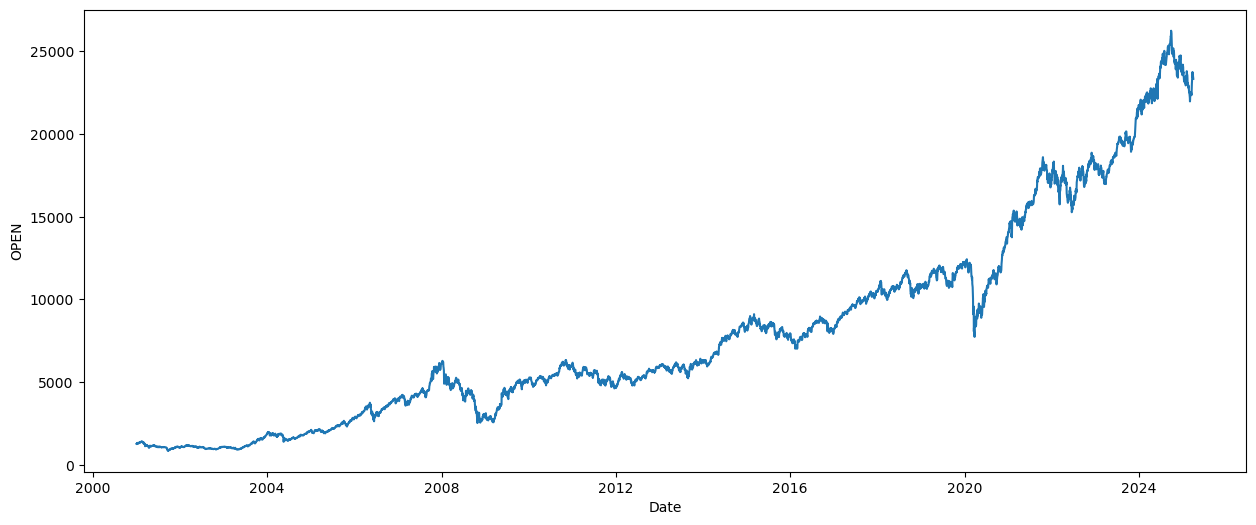

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(df["OPEN"])
plt.xlabel("Date")
plt.show()

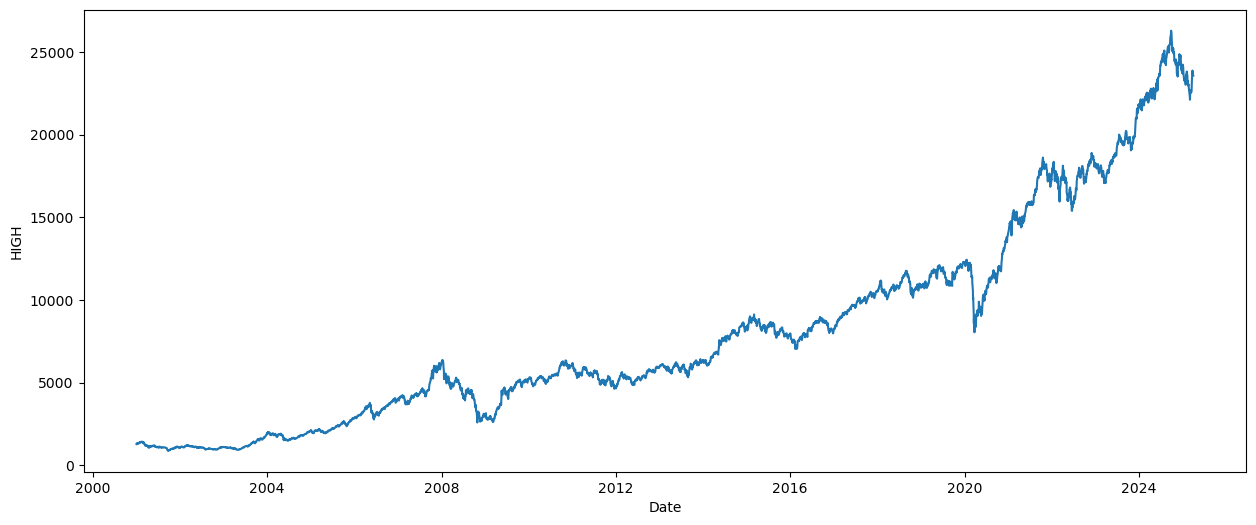

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(df["HIGH"])
plt.xlabel("Date")
plt.show()

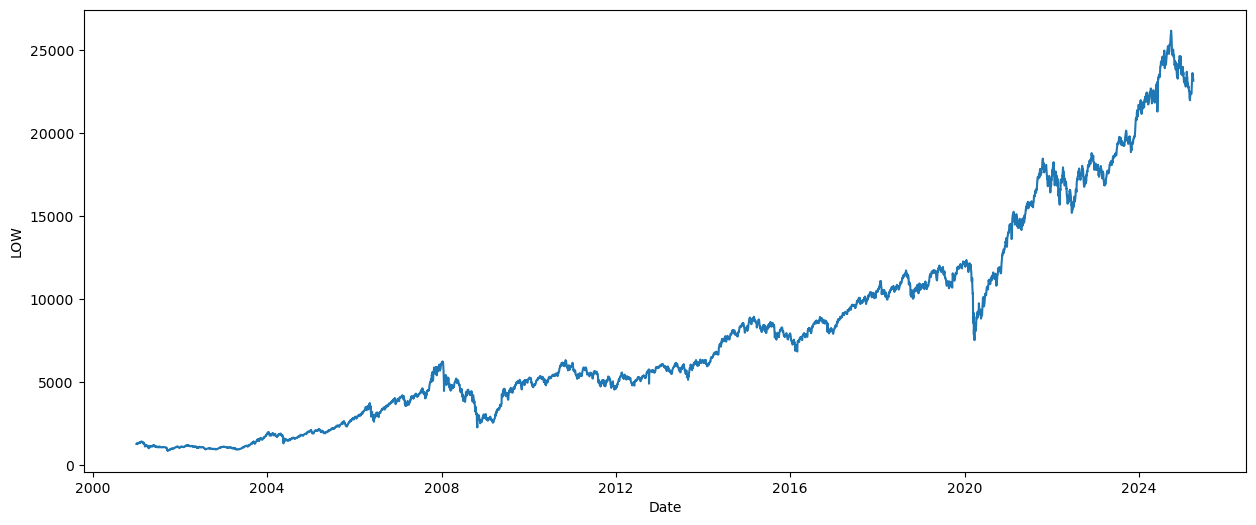

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(df["LOW"])
plt.xlabel("Date")
plt.show()

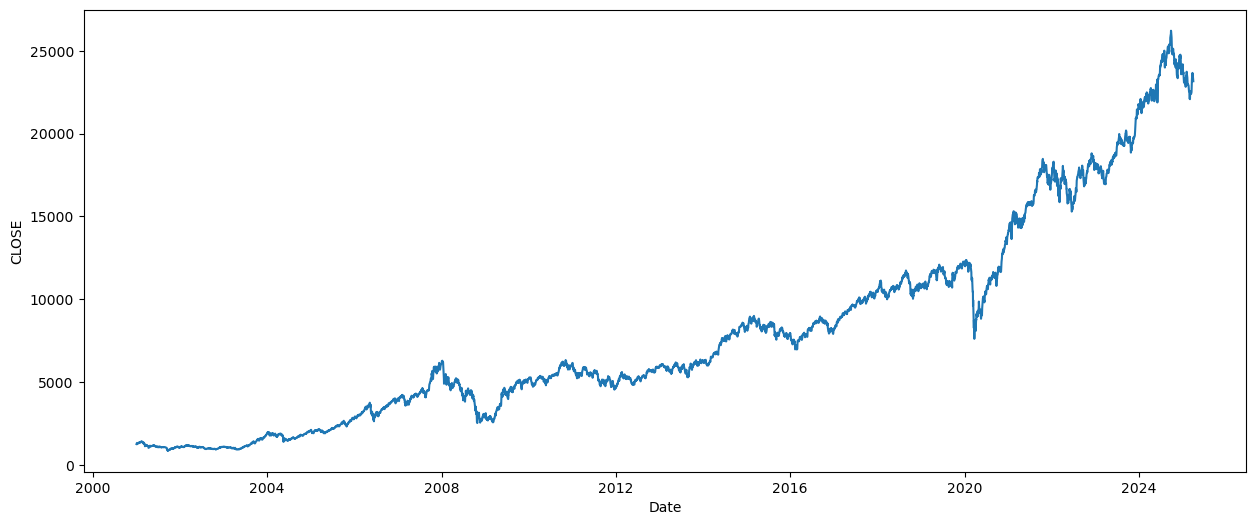

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(df["CLOSE"])
plt.xlabel("Date")
plt.show()

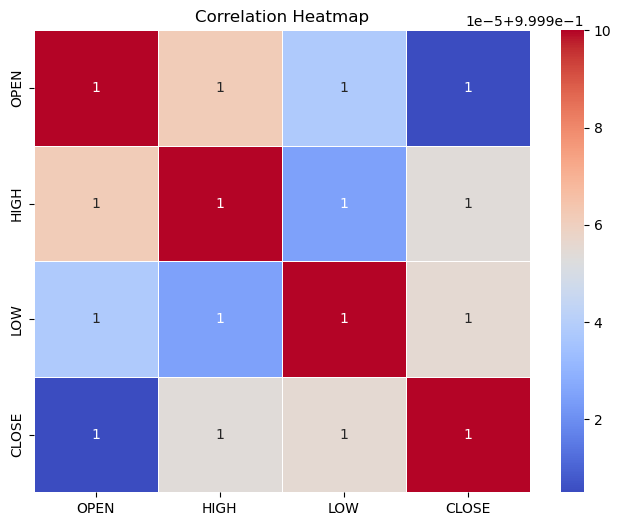

In [27]:
# Compute the correlation matrix
correlation_matrix = df[['OPEN', 'HIGH', 'LOW', 'CLOSE']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Skewness:  1.0318191860599986
Kurtosis:  0.2755409070734327


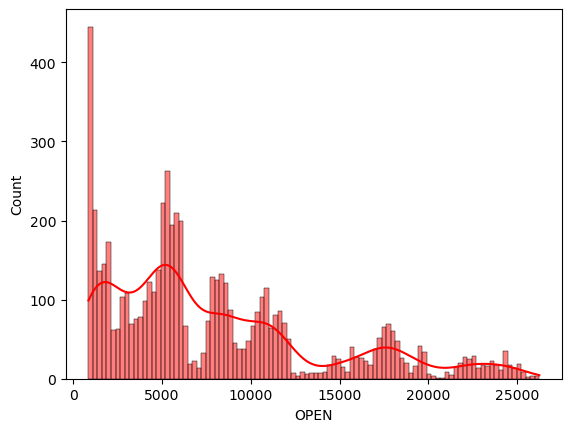

In [28]:
print("Skewness: ",df["OPEN"].skew())
print("Kurtosis: ",df["OPEN"].kurtosis())
sns.histplot(df["OPEN"], kde=True, color='red', bins=100)
plt.show()

Skewness:  1.0326235811065874
Kurtosis:  0.27757694479057315


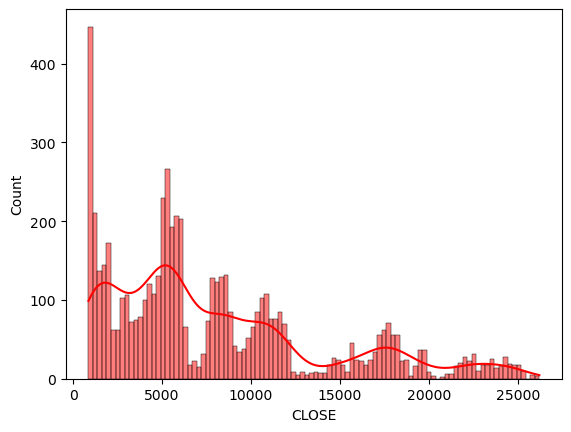

In [29]:
print("Skewness: ",df["CLOSE"].skew())
print("Kurtosis: ",df["CLOSE"].kurtosis())
sns.histplot(df["CLOSE"], kde=True, color='red', bins=100)
plt.show()

Skewness:  1.0316422105869576
Kurtosis:  0.27791547796912663


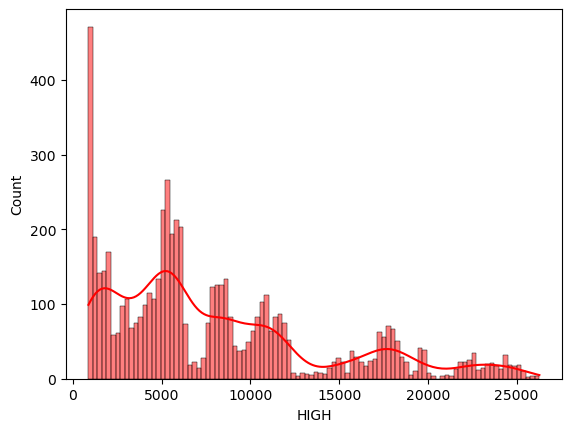

In [30]:
print("Skewness: ",df["HIGH"].skew())
print("Kurtosis: ",df["HIGH"].kurtosis())
sns.histplot(df["HIGH"], kde=True, color='red', bins=100)
plt.show()

Skewness:  1.0338223725057927
Kurtosis:  0.2791697991436002


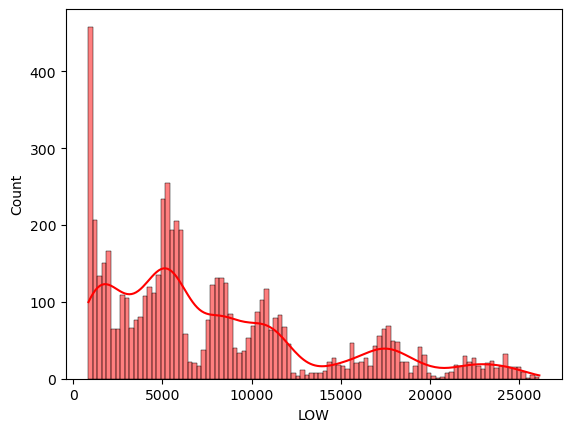

In [31]:
print("Skewness: ",df["LOW"].skew())
print("Kurtosis: ",df["LOW"].kurtosis())
sns.histplot(df["LOW"], kde=True, color='red', bins=100)
plt.show()

**Skewness**
- The skewness of *1.03* indicates a moderately right-skewed distribution, meaning that the data has a tail on the right side, or that higher values occur less frequently but are spread out.

**Kurtosis**
- The kurtosis of *0.28* suggests that the distribution is relatively flat compared to a normal distribution, indicating fewer outliers and a more uniform spread of values

###### 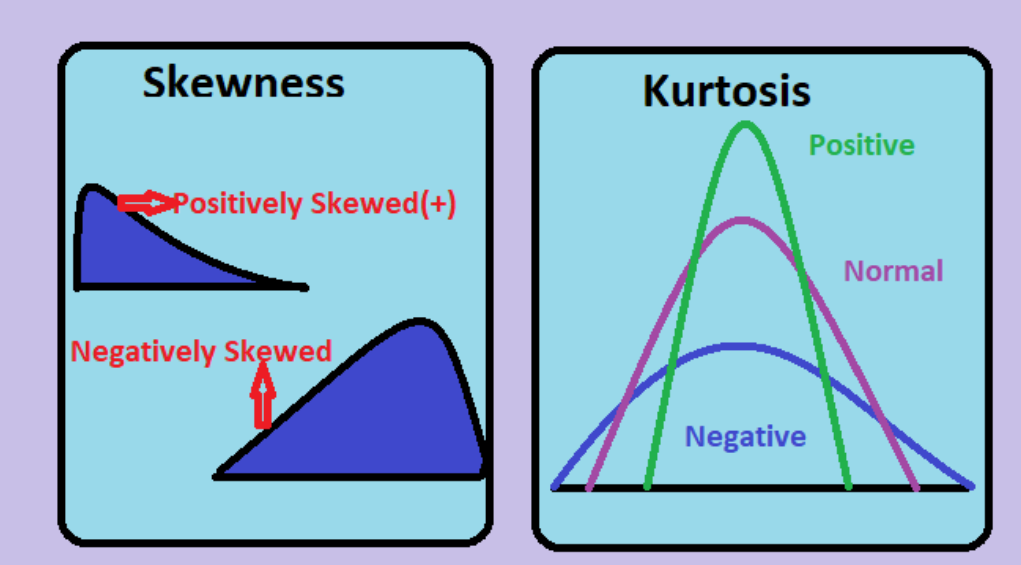

In [34]:
df.reset_index(drop=False, inplace = True)

In [35]:
df.sample()

,DATE,INDEX_NAME,OPEN,HIGH,LOW,CLOSE
3224,2013-11-29,Nifty 50,6103.9,6182.5,6103.8,6176.1


In [36]:
df.head()

,DATE,INDEX_NAME,OPEN,HIGH,LOW,CLOSE
0,2001-01-01,Nifty 50,1263.50,1276.15,1250.65,1254.30
1,2001-01-02,Nifty 50,1254.25,1279.60,1248.55,1271.80
2,2001-01-03,Nifty 50,1271.80,1293.55,1263.95,1291.25
3,2001-01-04,Nifty 50,1291.30,1331.35,1291.30,1307.65
4,2001-01-05,Nifty 50,1307.55,1330.30,1306.25,1327.25


In [37]:
X = df.iloc[:, 2:5]
X.head()

,OPEN,HIGH,LOW
0,1263.50,1276.15,1250.65
1,1254.25,1279.60,1248.55
2,1271.80,1293.55,1263.95
3,1291.30,1331.35,1291.30
4,1307.55,1330.30,1306.25


In [38]:
y = df.iloc[:,-1]
y

0        1254.30
1        1271.80
2        1291.25
3        1307.65
4        1327.25
          ...   
6025    23668.65
6026    23486.85
6027    23591.95
6028    23519.35
6029    23165.70
Name: CLOSE, Length: 6030, dtype: float64

In [39]:
dates = df["DATE"]

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X,y,dates,test_size=0.3,random_state=42 )

## Model Prep:

## Linear Regression

- Linear Regression is a fundamental supervised machine learning algorithm used for predicting a continuous target variable based on one or more independent predictor variables.
- The core idea is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual observed values

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Predicting the Result

In [47]:
y_pred = reg.predict(X_test)
y_pred

array([ 4644.37772962, 24182.02035451,  3547.47114265, ...,
        5663.04475681,  9306.96970775, 17569.23081248])

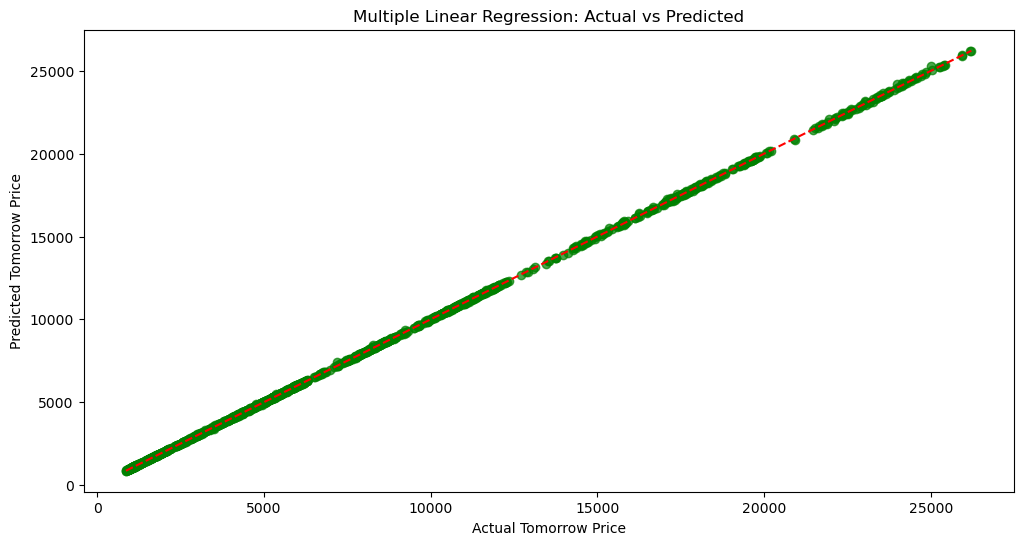

In [48]:
#Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tomorrow Price')
plt.ylabel('Predicted Tomorrow Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

In [49]:
result = pd.DataFrame({
    "Date":dates_test,
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result = result.sort_values(by="Date", ascending=True)
result.sample(10)

,Date,Actual,Predicted,Difference
2404,2010-08-19,5540.20,5534.322401,5.877599
3045,2013-03-11,5942.35,5952.843501,-10.493501
1170,2005-08-25,2354.55,2350.604377,3.945623
2226,2009-12-02,5123.25,5145.926692,-22.676692
4273,2018-02-28,10492.85,10505.724040,-12.874040
5778,2024-03-27,22123.65,22171.629564,-47.979564
1945,2008-10-03,3818.30,3857.612562,-39.312562
3209,2013-11-07,6187.25,6244.620852,-57.370852
1220,2005-11-09,2489.10,2500.825892,-11.725892
2323,2010-04-28,5215.45,5227.834995,-12.384995


## Central Tendency

In [51]:
max(result["Difference"])

138.4189018953184

In [52]:
min(result["Difference"])

-281.68746031917544

In [53]:
np.mean(result["Difference"])

-0.3809872225906897

In [54]:
print("Average: ",np.mean(y_pred - y_test))
print("Median: ",np.median(y_pred - y_test))
print("Standard Deviation: ",np.std(y_pred - y_test))

Average:  0.3809872225906898
Median:  -1.039403745372283
Standard Deviation:  32.13464828522246


## Evaluation Matrics

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9999721196260634

MAE is:  20.17876710006524

MSE is:  1032.7807716787263

RMSE is:  32.13690669119737


### 📏 Metric Ranges

| Metric   | Range                         |
|----------|-------------------------------|
| R²       | -∞ to 1 (closer to 1 is better) |
| MAE      | 0 to ∞ (lower is better)        |
| MSE      | 0 to ∞ (lower is better)        |
| RMSE     | 0 to ∞ (lower is better)        |


## Checking the Accuracy

In [59]:
print("Trainig Score: ",(reg.score(X_train, y_train))*100,"%")
print("Testing Score: ",(reg.score(X_test, y_test))*100,"%")

Trainig Score:  99.99685651174087 %
Testing Score:  99.99721196260634 %


## Decision Tree Regressor

- Decision tree works by splitting the data into smaller and smaller subsets based on features, forming a tree-like structure.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
dtree_y_pred = dtree.predict(X_test)
dtree_y_pred

array([10210.85,  5090.85,  1843.85, ..., 19444.  ,  5254.15,  1941.3 ])

In [68]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  99.99164001740898 %


In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, dtree_y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, dtree_y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, dtree_y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9999164001740899

MAE is:  32.978855721393046

MSE is:  3007.4094651741307

RMSE is:  54.83985289161643


In [70]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  99.99164001740898 %


## Random Forest Regressor

- A Random Forest Regressor is an ensemble learning method for regression tasks. It operates by constructing a multitude of decision trees at training time and outputting the average of the individual tree predictions.
- The "forest" it builds is an ensemble of decorrelated decision trees.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [74]:
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor(n_estimators=10,random_state =0)
ran_forest.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [75]:
rf_y_pred = ran_forest.predict(X_test)

In [76]:
r2 = r2_score(y_test, rf_y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, rf_y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, rf_y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9999902383196565

MAE is:  10.809361525704809

MSE is:  371.74402853786677

RMSE is:  19.280664629049145


In [77]:
print("Trainig Score: ",(ran_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(ran_forest.score(X_test, y_test))*100,"%")

Trainig Score:  99.99855460061737 %
Testing Score:  99.99902383196564 %


## Support Vector Machine

- A Support Vector Machine (SVM) Regressor is a supervised machine learning algorithm used for regression tasks. While traditional SVMs are well-known for classification, their principles can be extended to regression (often called Support Vector Regression or SVR).

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [82]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

In [83]:
svr_model.fit(X_train, y_train)

SVR(C=100)

In [84]:
svr_y_pred = svr_model.predict(X_test)

In [85]:
print("Trainig Score: ",(svr_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svr_model.score(X_test, y_test))*100,"%")

Trainig Score:  99.83849962503324 %
Testing Score:  99.51494334893798 %


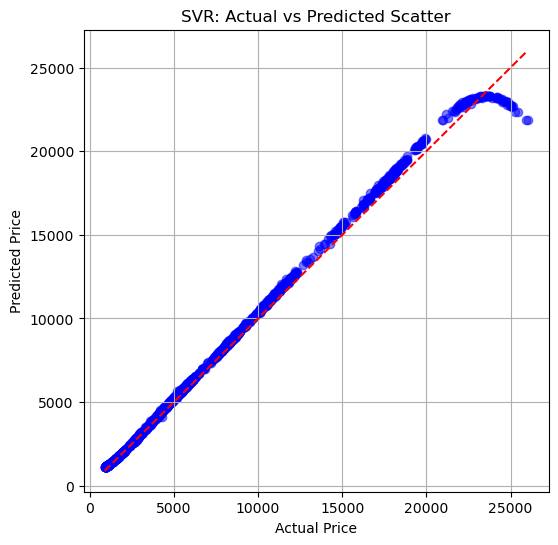

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, svr_y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.title('SVR: Actual vs Predicted Scatter')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [87]:
r2 = r2_score(y_test, svr_y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, svr_y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, svr_y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9951494334893798

MAE is:  296.81584719943703

MSE is:  173246.52051689438

RMSE is:  416.22892801545447


## K Nearest Neighbor 

- A K-Nearest Neighbors (KNN) Regressor is a non-parametric, lazy learning algorithm used for regression tasks. Unlike other models that explicitly learn a function from the training data, KNN simply stores the entire training dataset. When a prediction is needed for a new data point, it looks at its 'K' nearest neighbors in the training data.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [92]:
knn_y_pred = knn_model.predict(X_test)

In [93]:
r2 = r2_score(y_test, knn_y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, knn_y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, knn_y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.999939688962533

MAE is:  29.152880044223334

MSE is:  2154.1148579325577

RMSE is:  46.412442921403716


# Cross Validation for all Models

In [95]:
from sklearn.model_selection import cross_val_score

print("\nLinear Regression:")
print("Training cross validation score: ",round(((cross_val_score(reg, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(reg, X_test, y_test)).mean())*100,2))

print("\nDecision Tree Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(dtree, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(dtree, X_test, y_test)).mean())*100,2))

print("\nRandom Forest Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(ran_forest, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(ran_forest, X_test, y_test)).mean())*100,2))

print("\nSupport Vector Machine: ")
print("Training cross validation score: ",round(((cross_val_score(svr_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(svr_model, X_test, y_test)).mean())*100,2))

print("\nK Nearest Neighbor: ")
print("Training cross validation score: ",round(((cross_val_score(knn_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(knn_model, X_test, y_test)).mean())*100,2))


Linear Regression:
Training cross validation score:  100.0
Testing cross validation score:  100.0

Decision Tree Regressor: 
Training cross validation score:  99.99
Testing cross validation score:  99.99

Random Forest Regressor: 
Training cross validation score:  99.99
Testing cross validation score:  99.99

Support Vector Machine: 
Training cross validation score:  99.75
Testing cross validation score:  97.64

K Nearest Neighbor: 
Training cross validation score:  99.99
Testing cross validation score:  99.99


## Tommorow's Prediction:

In [199]:
# Step 1: Get the most recent day’s features
latest_features = df[['OPEN', 'HIGH', 'LOW']].iloc[-1].values.reshape(1, -1)

# Step 2: Predict tomorrow's price
tom_pred_linear_reg = reg.predict(latest_features)[0]
tom_pred_dtree = dtree.predict(latest_features)[0]
tom_pred_ran_forest = ran_forest.predict(latest_features)[0]
tom_pred_svr = svr_model.predict(latest_features)[0]
tom_pred_knn = knn_model.predict(latest_features)[0]


# Step 3: Calculate tomorrow's date
last_date = pd.to_datetime(df['DATE'].iloc[-1])
next_date = last_date + pd.Timedelta(days=1)

# Step 4: Show result
print(f"\nLINEAR REGRESSION: Predicted value for {next_date.date()}: {tom_pred_linear_reg:.2f}")
print(f"\nDECISION TREE: Predicted value for {next_date.date()}: {tom_pred_dtree:.2f}")
print(f"\nRANDOM FOREST: Predicted value for {next_date.date()}: {tom_pred_ran_forest:.2f}")
print(f"\nSUPPORT VECTOR MACHINE: Predicted value for {next_date.date()}: {tom_pred_svr:.2f}")
print(f"\nk-NEAREST NEIGHBOUR: Predicted value for {next_date.date()}: {tom_pred_knn:.2f}")


LINEAR REGRESSION: Predicted value for 2025-04-02: 23390.69

DECISION TREE: Predicted value for 2025-04-02: 23165.70

RANDOM FOREST: Predicted value for 2025-04-02: 23293.61

SUPPORT VECTOR MACHINE: Predicted value for 2025-04-02: 12036.56

k-NEAREST NEIGHBOUR: Predicted value for 2025-04-02: 23327.57


In [203]:
# Actual index value
index_history("NIFTY 50","02-Apr-2025","02-Apr-2025")

,RequestNumber,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,His63883497861937935100,,Nifty 50,02 Apr 2025,23192.6,23350,23158.45,23332.35


✅ **Actual NIFTY 50 Value on 02-Apr-2025**

Open: 23192.60

High: 23350.00

Low: 23158.45

Close (Actual Target): 23332.35

📈 **Model Predictions vs Actual Close**
Model Predicted Close	Difference from Actual	Remarks

*Linear Regression:*	23390.69	+58.34	Very close, slight overestimate

*Decision Tree:*	23165.70	-166.65	Underestimates, but within 1% range

*Random Forest:*	23293.61	-38.74	Very accurate, only ~0.17% off

*Support Vector Machine:*	12036.56	-11295.79	Highly inaccurate, predicts too low

**k-Nearest Neighbour:**	23327.57	-4.78	Almost perfect match, best performance


**Best Models:**

✅ k-Nearest Neighbour (KNN) gave the most accurate prediction—just 4.78 points off!

✅ Random Forest also did well with only a small error of ~39 points.

✅ Linear Regression slightly overestimated, but still very close(58.34).

**Moderate Model:**

🔶 Decision Tree was okay—off by around 167 points. It caught the trend but lacked precision.

**Poor Model:**

❌ Support Vector Machine (SVM) completely failed—predicting a value that’s not even close. Possibly not well-tuned or not suited for this dataset.

📌 **Conclusions**

The k-Nearest Neighbor (KNN), Random Forest, and Linear Regression models demonstrated notable accuracy in predicting the Nifty 50's closing price for April 2, 2025, with KNN being the most precise. The Decision Tree model provided a reasonable estimate but was less accurate for the closing price. In stark contrast, the Support Vector Machine (SVM) model performed poorly, indicating it was not suitable for this specific prediction task or requires significant tuning.

This highlights that for financial time series prediction, the choice and proper calibration of the machine learning model are crucial, and different models will yield varying degrees of success.

